# 🐸 KERMIT


In [ ]:
#download data
!wget https://raw.githubusercontent.com/LeonardRanaldi/NLP-tutorial-2021/main/data/Covid19/DarkWeb_COVID19.csv

--2022-01-20 08:48:57--  https://raw.githubusercontent.com/LeonardRanaldi/NLP-tutorial-2021/main/data/Covid19/DarkWeb_COVID19.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78980 (77K) [text/plain]
Saving to: ‘DarkWeb_COVID19.csv’

DarkWeb_COVID19.csv 100%[===================>]  77.13K  --.-KB/s    in 0.001s  

2022-01-20 08:48:57 (58.3 MB/s) - ‘DarkWeb_COVID19.csv’ saved [78980/78980]



In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('DarkWeb_COVID19.csv')


In [ ]:
df.head(10)

,Text,Main_Class,Sub_Class
0,I KNOW Covid First SARS RNA DNA. Only No DNA E...,Forum,COVID-19
1,Half Coronavirus Deaths Vaccinated People,Forum,COVID-19
2,Half Coronavirus Deaths Vaccinated People,Forum,COVID-19
3,Half Coronavirus Deaths Vaccinated People,Forum,COVID-19
4,UK: Half Coronavirus Deaths Vaccinated People,Forum,COVID-19
5,"As Delta U.K., Covid-19 But",Forum,COVID-19
6,"On Delta, India, U.S.,",Forum,COVID-19
7,"The U.K. Delta The By June, Delta And Delta",Forum,COVID-19
8,The Delta U.K. Covid But,Forum,COVID-19
9,Data Public Health England Delta June Fifty,Forum,COVID-19


In [ ]:
df.Main_Class.value_counts()

Forum     613
Market    355
Name: Main_Class, dtype: int64

In [ ]:
def setTarget(df):
    target = []
    for x in df.Main_Class:
        if x == 'Forum':
            target.append(0)
        if x == 'Market':
            target.append(1)
    return np.array(target)


In [ ]:
labels = setTarget(df)
sentences = df.Text.values

**Classical Steps...........**

Not today!

## install **Parser** & **KERMIT**

In [ ]:
#download and install parser
!pip install stanfordcorenlp
!wget http://nlp.stanford.edu/software/stanford-corenlp-full-2018-10-05.zip
!unzip stanford-corenlp-full-2018-10-05.zip

--2022-01-20 08:53:55--  http://nlp.stanford.edu/software/stanford-corenlp-full-2018-10-05.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/software/stanford-corenlp-full-2018-10-05.zip [following]
--2022-01-20 08:53:55--  https://nlp.stanford.edu/software/stanford-corenlp-full-2018-10-05.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-full-2018-10-05.zip [following]
--2022-01-20 08:53:55--  https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-full-2018-10-05.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... conn

In [ ]:
#download and install KERMIT
!git clone https://github.com/ART-Group-it/KERMIT
!pip install ./KERMIT/kerMIT

Cloning into 'KERMIT'...
remote: Enumerating objects: 622, done.
remote: Counting objects: 100% (203/203), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 622 (delta 138), reused 49 (delta 33), pack-reused 419
Receiving objects: 100% (622/622), 14.65 MiB | 25.30 MiB/s, done.
Resolving deltas: 100% (310/310), done.
Processing ./KERMIT/kerMIT
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 47 kB 5.2 MB/s 
  Created wheel for kerMIT: filename=kerMIT-2.0-py3-none-any.whl size=201720 sha256=40cdfe7c57355be9e50a8c1f9b8a48915c2d46b7929d2e126a63aa861ae45104
  Stored in directory: /tmp/pip-e

## Let's try to use **KERMIT**

In [ ]:
from kerMIT.dtk import DT
from kerMIT.operation import fast_shuffled_convolution

#parser definition
calculator = DT(dimension=4000, LAMBDA=0.6, operation=fast_shuffled_convolution)

In [ ]:
from kerMIT.tree_encode import parse as parse_tree
from kerMIT import tree
from kerMIT.dtk import DT
from tqdm import tqdm
import re
import torch
import pickle
import copy


#input: free text  output: DTK 
def get_sentence(sentence, calculator):
    # generate the parenthetic form
    tree_sentence = parse_tree(sentence)
    tree_sentence = re.sub("\("," (",tree_sentence)
    tree_sentence = tree_sentence[1:]
    # compute DTK
    alberoCompleto = tree.Tree(string=tree_sentence)
    dtk_sentence = calculator.dt(alberoCompleto).reshape(1,4000)
    dtk_sentence = torch.from_numpy(dtk_sentence).float().cuda()
    return tree_sentence, dtk_sentence

sentence = 'Prof Zanzotto this is KERMIT!'

dtk_sentence = get_sentence(sentence, calculator)

In [ ]:
dtk_sentence[0]

'(S     (NP       (NP  (NNP Prof)  (NNP Zanzotto))       (NP  (DT this)))     (VP  (VBZ is)       (NP  (NNP KERMIT)))     (. !))'

In [ ]:
dtk_sentence[1]

tensor([[ 3.3933e-02, -1.9137e-02, -6.9246e-02,  ...,  1.3448e-02,
          3.0968e-05,  1.3889e-02]], device='cuda:0')

## Data encoding

In [ ]:
trees_DTK = []

for sentence in tqdm(sentences):
    dtk_sentence = get_sentence(sentence, calculator)
    dtk_sentence = torch.flatten(dtk_sentence[1])
    trees_DTK.append(dtk_sentence)

100%|██████████| 968/968 [01:12<00:00, 13.35it/s]


In [ ]:
#save DTKs in file .pkl

f=open('trees_DTK.pkl', 'wb')        
for vec in trees_DTK:
    pickle.dump(vec, f)
f.close()

In [ ]:
def readP(nome):
    data = []
    with open(nome, 'rb') as fr:
        try:
            while True:
                data.append(pickle.load(fr))
        except EOFError:
            pass
    return data


trees_DTK = readP('trees_DTK.pkl')


## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 23

torch.manual_seed(23)
X_train, X_test, target_train, target_test = train_test_split(trees_DTK, labels, random_state=RANDOM_STATE, test_size=0.3)
X_train, X_validation, target_train, target_validation = train_test_split(X_train, target_train, random_state=RANDOM_STATE, test_size=0.1)


X_train = torch.stack(X_train)
target_train = torch.tensor(target_train)
X_validation = torch.stack(X_validation)
target_validation = torch.tensor(target_validation)
X_test = torch.stack(X_test)
target_test = torch.tensor(target_test)

X_train.shape, X_validation.shape, X_test.shape

(torch.Size([609, 4000]), torch.Size([68, 4000]), torch.Size([291, 4000]))

## DataLoader


So far, we have used all the training data at each training step. 

(This is fine for our ridiculously small data set!)

If we're serious about this, we need to use mini-batches. 
So, we need to slice our dataset accordingly. 

We use PyTorch's DataLoader class for this job. We tell it which dataset to use, the desired batch size, and whether we want to mix it or not. That's it!

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 1

train_data = TensorDataset(X_train, target_train)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(X_validation, target_validation)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

test_data = TensorDataset(X_test, target_test)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [ ]:
from torch import nn
from torch.utils.data.sampler import SubsetRandomSampler

learning_rate = 0.0001 ## step size used by SGD 
momentum = 0.0 ## Momentum is a moving average of our gradients (helps to keep direction)
num_epochs = 10  # number of times you will iterate through the full training data


class SVM_Loss(nn.modules.Module):    
    def __init__(self):
        super(SVM_Loss,self).__init__()
    def forward(self, outputs, labels):
         return torch.sum(torch.clamp(1 - outputs.t()*labels, min=0))/batch_size

#SVM regression model and Loss
svm_model = nn.Linear(4000,2)

## Loss criteria and SGD optimizer
svm_loss_criteria = SVM_Loss()

svm_optimizer = torch.optim.SGD(svm_model.parameters(), lr=learning_rate, momentum=momentum)

total_step = len(train_dataloader)
for epoch in range(num_epochs):
    avg_loss_epoch = 0
    batch_loss = 0
    total_batches = 0
    for step, batch in enumerate(train_dataloader):

        #unpacking batch data
        batch = tuple(t.cpu() for t in batch)

        
        # Forward pass
        tree, labels = batch
        outputs = svm_model(tree)           
        loss_svm = svm_loss_criteria(outputs, labels)    
        
       
        # Backward and optimize
        svm_optimizer.zero_grad()
        loss_svm.backward()
        svm_optimizer.step()    

        total_batches += 1     
        batch_loss += loss_svm.item()

    avg_loss_epoch = batch_loss/total_batches
    print ('Epoch [{}/{}], Averge Loss:for epoch[{}, {:.4f}]' 
                   .format(epoch+1, num_epochs, epoch+1, avg_loss_epoch ))
        


Epoch [1/10], Averge Loss:for epoch[1, 1.9855]
Epoch [2/10], Averge Loss:for epoch[2, 1.9508]
Epoch [3/10], Averge Loss:for epoch[3, 1.9162]
Epoch [4/10], Averge Loss:for epoch[4, 1.8815]
Epoch [5/10], Averge Loss:for epoch[5, 1.8468]
Epoch [6/10], Averge Loss:for epoch[6, 1.8121]
Epoch [7/10], Averge Loss:for epoch[7, 1.7784]
Epoch [8/10], Averge Loss:for epoch[8, 1.7466]
Epoch [9/10], Averge Loss:for epoch[9, 1.7154]
Epoch [10/10], Averge Loss:for epoch[10, 1.6850]


In [ ]:
# Test the SVM Model
correct = 0.
total = 0.
for step, batch in enumerate(test_dataloader):
  batch = tuple(t.cpu() for t in batch)
  # Forward pass
  tree, labels = batch
    
  outputs = svm_model(tree)    
  predicted = outputs.data >= 0
  total += labels.size(0) 
  correct += (predicted.view(-1).long() == labels).sum()    
 
print('Accuracy of the model on the test: %f %%' % (100 * (correct.float() / total)))

Accuracy of the model on the test: 68.728523 %


# BERT

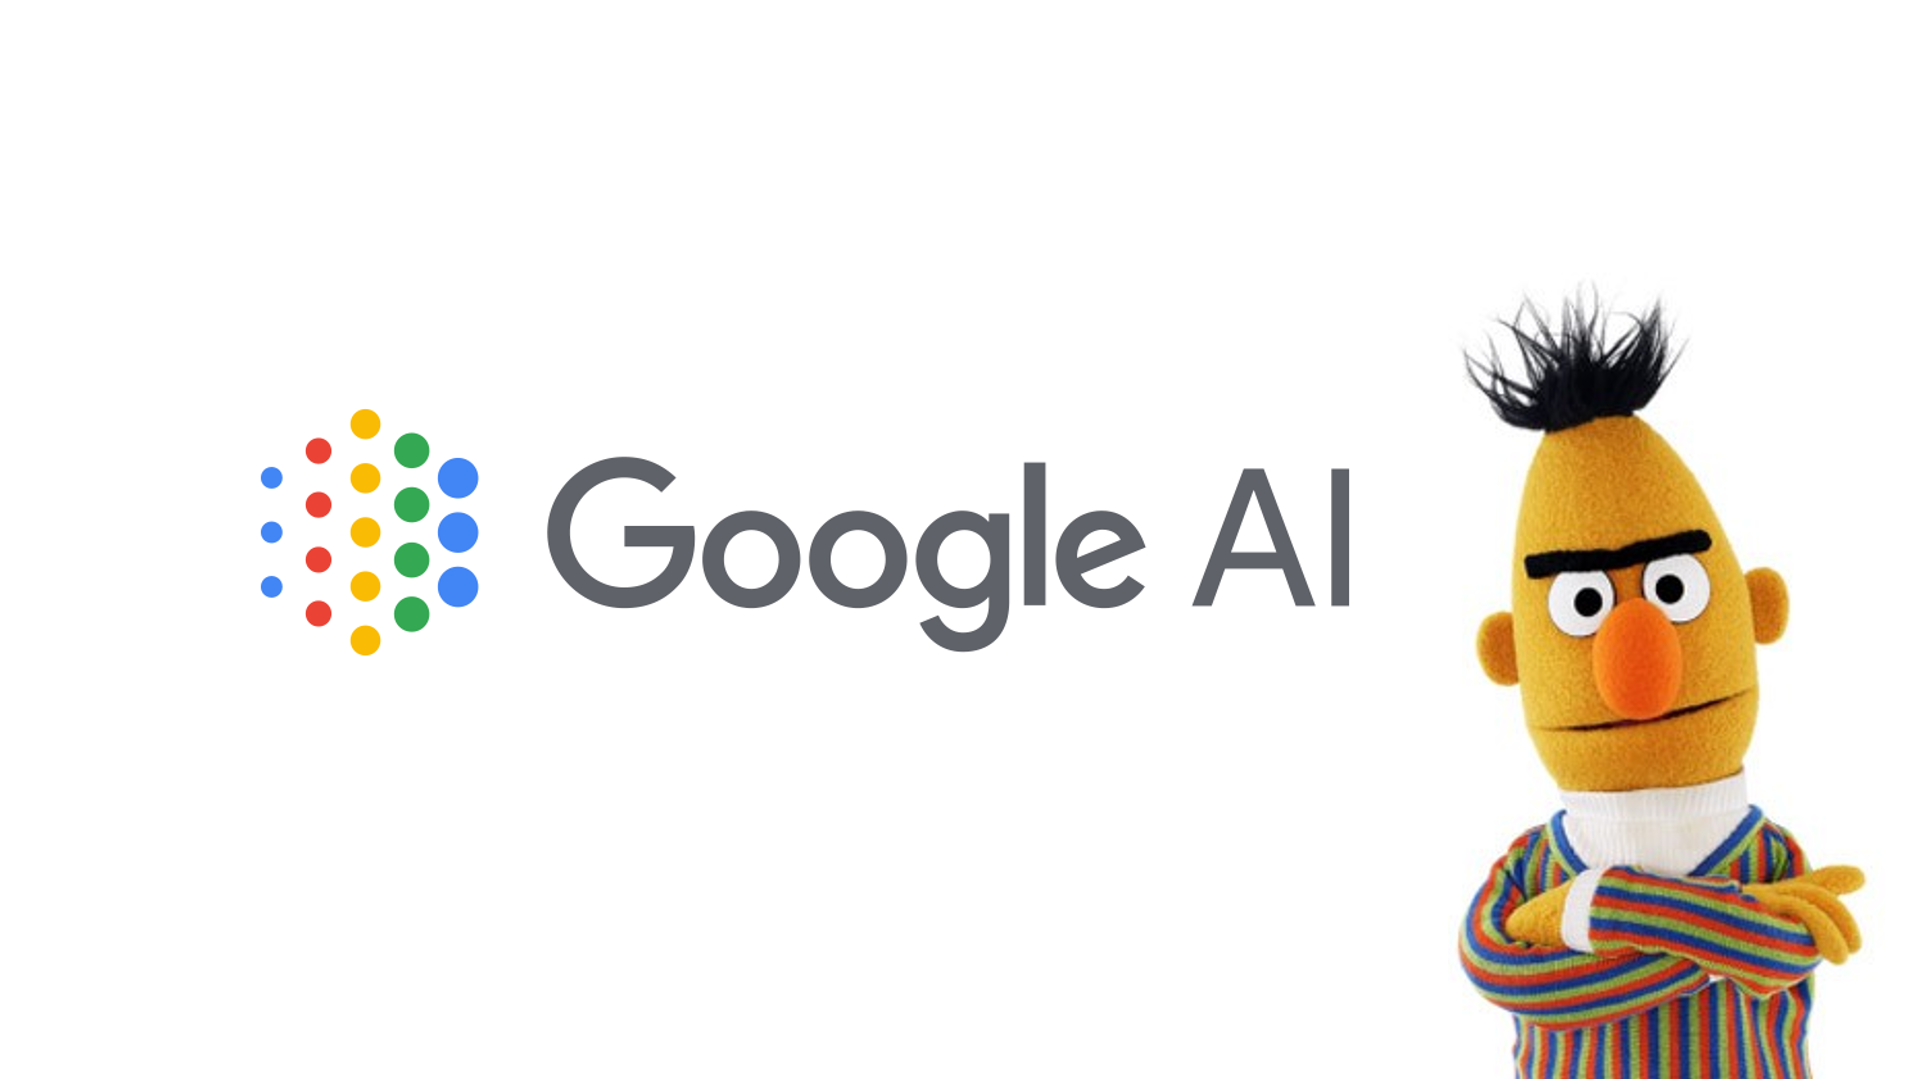

In [ ]:
#required version
!pip install transformers
!pip install -Iv botocore==1.17

     |████████████████████████████████| 3.4 MB 29.0 MB/s 
     |████████████████████████████████| 67 kB 6.2 MB/s 
     |████████████████████████████████| 3.3 MB 58.6 MB/s 
     |████████████████████████████████| 895 kB 70.4 MB/s 
     |████████████████████████████████| 596 kB 72.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa

In [ ]:
import transformers
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from torch import optim
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModel, BertTokenizer, BertModel

In [ ]:
labels = setTarget(df)
sentences = df.Text.values

In [ ]:
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
tokenized_texts[0]

['[CLS]',
 'i',
 'know',
 'co',
 '##vid',
 'first',
 'sar',
 '##s',
 'rna',
 'dna',
 '.',
 'only',
 'no',
 'dna',
 'especially',
 'as',
 'vaccine',
 ',',
 'they',
 'dna',
 ',',
 'if',
 'cancer',
 ',',
 'aids',
 ',',
 'no',
 'sar',
 '##s',
 'dna',
 '.',
 'people',
 'funny',
 'of',
 'just',
 'i',
 'i',
 'i',
 'all',
 'really',
 'fever',
 ',',
 'the',
 'i',
 'we',
 'id',
 '##k',
 'i',
 'california',
 ',',
 'usa',
 'california',
 'co',
 '##vid',
 'huntington',
 'memorial',
 'hospital',
 'pasadena',
 ',',
 'ca',
 'i',
 'co',
 '##vid',
 '.',
 'you',
 'co',
 '##vid',
 '.',
 'the',
 'strokes',
 ',',
 'if',
 '5',
 '##g',
 'co',
 '##vid',
 '"',
 'wu',
 '##han',
 'everything',
 '5',
 '##g',
 '.',
 'our',
 '5',
 '##g',
 '4',
 '##g',
 ',',
 'the',
 'department',
 'defense',
 '5',
 '##g',
 'this',
 'the',
 'silent',
 'war',
 '.',
 'the',
 'in',
 'usa',
 ',',
 'maintain',
 'billion',
 'that',
 'they',
 'these',
 'it',
 'no',
 ',',
 'american',
 ',',
 'trump',
 'they',
 'truth',
 'trump',
 '[SEP]']

In [ ]:
MAX_LEN = 128
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [ ]:
attention_masks = []

for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

## Splitting Data & Batch

In [ ]:
X_inputs, test_inputs, X_labels, test_labels = train_test_split(input_ids, labels, random_state=RANDOM_STATE, test_size=0.2)
X_masks, test_masks, _, _ = train_test_split(attention_masks, input_ids, random_state=RANDOM_STATE, test_size=0.2)
X_trees, test_trees, _, _ = train_test_split(trees_DTK, input_ids, random_state=RANDOM_STATE, test_size=0.2)

train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(X_inputs, X_labels, random_state=RANDOM_STATE, test_size=0.3)
train_masks, validation_masks, _, _ = train_test_split(X_masks, X_inputs, random_state=RANDOM_STATE, test_size=0.3)
train_trees, validation_trees, _, _ = train_test_split(X_trees, X_inputs, random_state=RANDOM_STATE, test_size=0.3)

train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)
train_trees = torch.stack(train_trees)

validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(validation_labels)
validation_masks = torch.tensor(validation_masks)
validation_trees = torch.stack(validation_trees)

test_inputs = torch.tensor(test_inputs)
test_labels = torch.tensor(test_labels)
test_masks = torch.tensor(test_masks)
test_trees = torch.stack(test_trees)

batch_size = 32

train_data = TensorDataset(train_inputs, train_masks, train_trees, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_trees, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

test_data = TensorDataset(test_inputs, test_masks, test_trees, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [ ]:
class Kermit_Bert(nn.Module):
    def __init__(self, input_dim_bert, input_dim_dt, output_dim):
        super().__init__()
        self.bert = AutoModel.from_pretrained("bert-base-uncased").to("cuda" if torch.cuda.is_available() else "cpu")
        self.dropout = nn.Dropout(0.1)
        
        self.fc1 = torch.nn.Linear(input_dim_dt, 2000)
        self.fc2 = torch.nn.Linear(2000, 4000)
        self.fc3 = torch.nn.Linear(4000, 2000)
        self.fc4 = torch.nn.Linear(2000, 4000)

        self.synth_sem_linear = nn.Linear(input_dim_bert + 4000, output_dim)


    def forward(self, x_sem, attention_mask, x_synth):
        with torch.no_grad():
            x_sem = self.bert(x_sem)[0][:, 0, :]
        
        x_sem = self.dropout(x_sem)
        
        x_synth = F.dropout(F.relu(self.fc1(x_synth)), p=0.1)
        x_synth = F.dropout(F.relu(self.fc2(x_synth)), p=0.1)
        x_synth = F.dropout(F.relu(self.fc3(x_synth)), p=0.1)
        x_synth = F.dropout(F.relu(self.fc4(x_synth)), p=0.1)
        
        x_tot = torch.cat((x_sem, x_synth), 1)
        x_tot = self.synth_sem_linear(x_tot)
        
        return x_tot  

class Bert_(nn.Module):
    def __init__(self, input_dim_bert, input_dim_dt, output_dim):
        super().__init__()
        self.bert = AutoModel.from_pretrained("bert-base-uncased").to("cuda" if torch.cuda.is_available() else "cpu")
        self.dropout = nn.Dropout(0.1)
        self.synth_sem_linear = nn.Linear(input_dim_bert, output_dim)


    def forward(self, x_sem, attention_mask, x_synth):
        with torch.no_grad():
            x_sem = self.bert(x_sem)[0][:, 0, :]
        x_tot = self.synth_sem_linear(x_sem)
        
        return x_tot  

In [ ]:
unique, counts = np.unique(labels, return_counts = True)

print(unique, counts)

[0 1] [613 355]


In [ ]:
model = Bert_(768,4000,2)

#model = Kermit_Bert(768,4000,2)


weights = [1/counts[0], 1/counts[1]] #[ 1 / number of instances for each class]
class_weights = torch.FloatTensor(weights).cuda()

criterion = nn.CrossEntropyLoss(weight=class_weights)
#criterion = nn.NLLLoss()
#criterion = nn.CrossEntropyLoss()
parameters = filter(lambda p: p.requires_grad, model.parameters())
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
model.cuda()

Bert_(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      

In [ ]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
from tqdm import tqdm, trange


# Store our loss and accuracy for plotting
train_loss_set = []
# Number of training epochs 
epochs = 5
epoch = 0

# BERT training loop
for _ in trange(epochs, desc="Epoch"):  
    model.train()  
      # Tracking variables
    tr_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0

    for step, batch in enumerate(train_dataloader):

        # Add batch to GPU
        batch = tuple(t.cuda() for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask,b_input_tree, b_labels = batch
        # Clear out the gradients (by default they accumulate)
        optimizer.zero_grad()
        ## Forward pass
        target_hat = model(b_input_ids, b_input_mask,b_input_tree)
        
        loss = criterion(target_hat, b_labels)
        train_loss_set.append(loss.item())
        
        # Backward pass
        loss.backward()
        # Update parameters and take a step using the computed gradient
        optimizer.step()
        # Update tracking variables
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1

    ## VALIDATION

  # Put model in evaluation mode
    model.eval()
    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    # Evaluate data for one epoch
    for batch in validation_dataloader:
        # Add batch to GPU
        batch = tuple(t.cuda() for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_input_tree, b_labels = batch
        # Telling the model not to compute or store gradients, saving memory and speeding up validation
        with torch.no_grad():
            
          # Forward pass, calculate logit predictions
        
          logits = model(b_input_ids, b_input_mask, b_input_tree)
            
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)    
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1
        
    epoch +=1
    
    print("Epochs: {}".format(epoch))
    print("Train loss: {}".format(tr_loss/nb_tr_steps))
    print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

Epoch:  20%|██        | 1/5 [00:06<00:24,  6.08s/it]

Epochs: 1
Train loss: 0.7109452976899988
Validation Accuracy: 0.6011284722222222


Epoch:  40%|████      | 2/5 [00:12<00:18,  6.14s/it]

Epochs: 2
Train loss: 0.7094083182951983
Validation Accuracy: 0.5659722222222222


Epoch:  60%|██████    | 3/5 [00:18<00:12,  6.23s/it]

Epochs: 3
Train loss: 0.7069554223733789
Validation Accuracy: 0.5464409722222222


Epoch:  80%|████████  | 4/5 [00:25<00:06,  6.31s/it]

Epochs: 4
Train loss: 0.7036947923548081
Validation Accuracy: 0.4561631944444444


Epoch: 100%|██████████| 5/5 [00:31<00:00,  6.29s/it]

Epochs: 5
Train loss: 0.7050108418745153
Validation Accuracy: 0.4600694444444444


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
predictions = []
model.eval()

for batch in test_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_input_tree, b_labels = batch

    with torch.no_grad():
        logits =model(b_input_ids, b_input_mask, b_input_tree)
    logits = logits.detach().cpu().numpy()

    predictions.append(logits)
    
    flat_predictions = [item for sublist in predictions for item in sublist]
    flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn import metrics

In [ ]:
print(metrics.classification_report(test_labels.numpy(), flat_predictions))

              precision    recall  f1-score   support

           0       0.65      0.57      0.61       131
           1       0.29      0.37      0.32        63

    accuracy                           0.51       194
   macro avg       0.47      0.47      0.47       194
weighted avg       0.53      0.51      0.52       194



In [ ]:
from torch import optim
from torch import nn
import torch.nn.functional as F
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

class DT_DarioNet(nn.Module):
    def __init__(self, input_dim_dt, output_dim):
        super().__init__()
        self.fc1 = torch.nn.Linear(input_dim_dt, 8000)
        self.fc2 = torch.nn.Linear(8000, 4000)
        self.fc3 = torch.nn.Linear(4000, 2000)
        self.synth_sem_linear = nn.Linear(2000, output_dim)


    def forward(self, x_synth):        
        x_synth = F.dropout(F.relu(self.fc1(x_synth)), p=0.1)
        x_synth = F.dropout(F.relu(self.fc2(x_synth)), p=0.1)
        x_synth = F.dropout(F.relu(self.fc3(x_synth)), p=0.1)
        x_tot = self.synth_sem_linear(x_synth)
        return x_tot   

class DT_DarioNet_2(nn.Module):
    def __init__(self, input_dim_dt, output_dim):
        super().__init__()
        self.fc1 = torch.nn.Linear(input_dim_dt, 1000)
        #self.fc2 = torch.nn.Linear(4000, 3000)
        #self.fc3 = torch.nn.Linear(3000, 1000)
        self.synth_sem_linear = nn.Linear(1000, output_dim)


    def forward(self, x_synth):        
        x_synth = F.dropout(F.relu(self.fc1(x_synth)), p=0.1)
        #x_synth = F.dropout(F.relu(self.fc2(x_synth)), p=0.1)
        #x_synth = F.dropout(F.relu(self.fc3(x_synth)), p=0.1)
        x_tot = self.synth_sem_linear(x_synth)
        return x_tot 

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
unique_train, counts_train = np.unique(target_train, return_counts = True)
unique_validation, counts_validation = np.unique(target_validation, return_counts = True)
unique_test, counts_test = np.unique(target_test, return_counts = True)
print(counts_train, counts_validation, counts_test)

[389 220] [33 35] [191 100]


In [ ]:
model = DT_DarioNet_2(4000,2)
criterion = nn.CrossEntropyLoss()
parameters = filter(lambda p: p.requires_grad, model.parameters())
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

In [ ]:
model.cuda()

DT_DarioNet_2(
  (fc1): Linear(in_features=4000, out_features=1000, bias=True)
  (synth_sem_linear): Linear(in_features=1000, out_features=2, bias=True)
)

In [ ]:
from tqdm import trange


# Store our loss and accuracy for plotting
train_loss_set = []
# Number of training epochs
epochs = 5
epoch = 0

# BERT training loop
for _ in trange(epochs, desc="Epoch"):  
    model.train()  
      # Tracking variables
    tr_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0
  # Train the data for one epoch
    for step, batch in enumerate(train_dataloader):
        #print(step, batch)
        # Add batch to GPU
        batch = tuple(t.cuda() for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask,b_input_tree, b_labels = batch
        # Clear out the gradients (by default they accumulate)
        optimizer.zero_grad()
        # Forward pass
        target_hat = model(b_input_tree)
        
        loss = criterion(target_hat, b_labels)
        train_loss_set.append(loss.item())
        
        # Backward pass
        loss.backward()
        # Update parameters and take a step using the computed gradient
        optimizer.step()
        # Update tracking variables
        tr_loss += loss.item()
        #nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1

    ## VALIDATION

  # Put model in evaluation mode
    model.eval()
    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    # Evaluate data for one epoch
    for batch in validation_dataloader:
        # Add batch to GPU
        batch = tuple(t.cuda() for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask,b_input_tree, b_labels = batch
        # Telling the model not to compute or store gradients, saving memory and speeding up validation
        with torch.no_grad():
            logits = model(b_input_tree)
            
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)    
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1
        
    epoch +=1
    
    print("Epochs: {}".format(epoch))
    print("Train loss: {}".format(tr_loss/nb_tr_steps))
    print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

Epoch:  80%|████████  | 4/5 [00:00<00:00, 15.69it/s]

Epochs: 1
Train loss: 0.6891370485810673
Validation Accuracy: 0.6753472222222222
Epochs: 2
Train loss: 0.6668937556883868
Validation Accuracy: 0.7651909722222222
Epochs: 3
Train loss: 0.6471066860591664
Validation Accuracy: 0.7868923611111112
Epochs: 4
Train loss: 0.629357232766993
Validation Accuracy: 0.7868923611111112


Epoch: 100%|██████████| 5/5 [00:00<00:00, 15.52it/s]

Epochs: 5
Train loss: 0.6106171502786524
Validation Accuracy: 0.7907986111111112


In [ ]:
predictions = []
model.eval()

for batch in test_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask,b_input_tree, b_labels = batch

    with torch.no_grad():
        logits = model(b_input_tree)
    logits = logits.detach().cpu().numpy()

    predictions.append(logits)
    
    flat_predictions = [item for sublist in predictions for item in sublist]
    flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn import metrics

print(metrics.classification_report(test_labels.numpy(), flat_predictions))

In [ ]:
class Kermit_Potter(nn.Module):
    def __init__(self, input_dim_bert, input_dim_dt, output_dim):
        super().__init__()
        self.bert = AutoModel.from_pretrained("bert-base-uncased").to("cuda" if torch.cuda.is_available() else "cpu")
        self.dropout = nn.Dropout(0.1)
        
        self.fc1 = torch.nn.Linear(input_dim_dt, 4000)
        self.fc2 = torch.nn.Linear(4000, 8000)
        self.fc3 = torch.nn.Linear(8000, 4000)
        self.fc4 = torch.nn.Linear(4000, 4000)

        self.synth_sem_linear = nn.Linear(input_dim_bert + 4000, output_dim)


    def forward(self, x_sem, attention_mask, x_synth):
        with torch.no_grad():
            x_sem = self.bert(x_sem)[0][:, 0, :]
        
        x_sem = self.dropout(x_sem)
        
        x_synth = F.dropout(F.relu(self.fc1(x_synth)), p=0.1)
        x_synth = F.dropout(F.relu(self.fc2(x_synth)), p=0.1)
        x_synth = F.dropout(F.relu(self.fc3(x_synth)), p=0.1)
        x_synth = F.dropout(F.relu(self.fc4(x_synth)), p=0.1)
        
        x_tot = torch.cat((x_sem, x_synth), 1)
        x_tot = self.synth_sem_linear(x_tot)
        
        return x_tot  

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model = Kermit_Potter(768,4000,2)
criterion = nn.CrossEntropyLoss()
parameters = filter(lambda p: p.requires_grad, model.parameters())
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
model.cuda()

Kermit_Potter(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True

In [ ]:
from tqdm import trange


# Store our loss and accuracy for plotting
train_loss_set = []
# Number of training epochs
epochs = 5
epoch = 0

# BERT training loop
for _ in trange(epochs, desc="Epoch"):  
    model.train()  
      # Tracking variables
    tr_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0
  # Train the data for one epoch
    for step, batch in enumerate(train_dataloader):
        #print(step, batch)
        # Add batch to GPU
        batch = tuple(t.cuda() for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask,b_input_tree, b_labels = batch
        # Clear out the gradients (by default they accumulate)
        optimizer.zero_grad()
        # Forward pass
        target_hat = model(b_input_ids, b_input_mask,b_input_tree)
        
        loss = criterion(target_hat, b_labels)
        train_loss_set.append(loss.item())
        
        # Backward pass
        loss.backward()
        # Update parameters and take a step using the computed gradient
        optimizer.step()
        # Update tracking variables
        tr_loss += loss.item()
        #nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1

    ## VALIDATION

  # Put model in evaluation mode
    model.eval()
    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    # Evaluate data for one epoch
    for batch in validation_dataloader:
        # Add batch to GPU
        batch = tuple(t.cuda() for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask,b_input_tree, b_labels = batch
        # Telling the model not to compute or store gradients, saving memory and speeding up validation
        with torch.no_grad():
            logits = model(b_input_ids, b_input_mask,b_input_tree)
            
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)    
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1
        
    epoch +=1
    
    print("Epochs: {}".format(epoch))
    print("Train loss: {}".format(tr_loss/nb_tr_steps))
    print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

Epoch:  20%|██        | 1/5 [00:06<00:26,  6.67s/it]

Epochs: 1
Train loss: 0.6938520494629355
Validation Accuracy: 0.6011284722222222


Epoch:  40%|████      | 2/5 [00:13<00:20,  6.70s/it]

Epochs: 2
Train loss: 0.621991844738231
Validation Accuracy: 0.6011284722222222


Epoch:  60%|██████    | 3/5 [00:20<00:13,  6.80s/it]

Epochs: 3
Train loss: 0.5744893358034246
Validation Accuracy: 0.6128472222222222


Epoch:  80%|████████  | 4/5 [00:27<00:06,  6.91s/it]

Epochs: 4
Train loss: 0.4822356367812437
Validation Accuracy: 0.7456597222222222


Epoch: 100%|██████████| 5/5 [00:34<00:00,  6.91s/it]

Epochs: 5
Train loss: 0.34188399945988374
Validation Accuracy: 0.8298611111111112


In [ ]:
predictions = []
model.eval()

for batch in test_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask,b_input_tree, b_labels = batch

    with torch.no_grad():
        logits = model(b_input_ids, b_input_mask,b_input_tree)
    logits = logits.detach().cpu().numpy()

    predictions.append(logits)
    
    flat_predictions = [item for sublist in predictions for item in sublist]
    flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn import metrics

print(metrics.classification_report(test_labels.numpy(), flat_predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       131
           1       0.97      0.60      0.75        63

    accuracy                           0.87       194
   macro avg       0.91      0.80      0.83       194
weighted avg       0.88      0.87      0.86       194

